In [5]:
import os 
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

Assigning the folder to Test_Dir 


In [2]:
TEST_DIR = "input_test"

Printing down the list of images in Input_Test Files 


In [3]:
test_images = os.listdir(TEST_DIR)
print("Total Test Images:", len(test_images))

Total Test Images: 1055


The total number images is 1055 

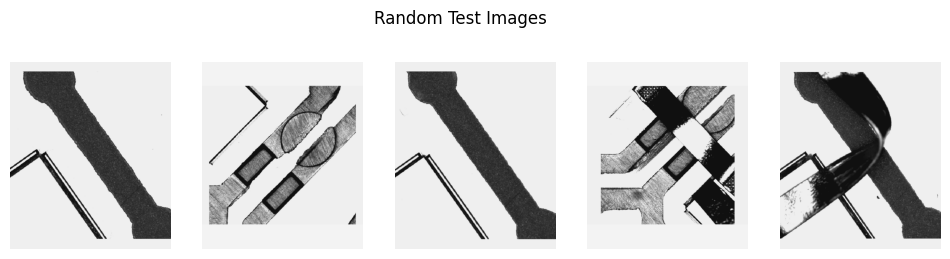

In [4]:
sample_imgs = random.sample(test_images, 5)

plt.figure(figsize=(12, 3))

for i, file in enumerate(sample_imgs):
    img = cv2.imread(os.path.join(TEST_DIR, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")

plt.suptitle("Random Test Images")
plt.show()

conforming that there is no broken images \


In [6]:


heights, widths = [], []

for file in test_images:
    img = cv2.imread(os.path.join(TEST_DIR, file))
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)

heights = np.array(heights)
widths = np.array(widths)

print("Height -> Min:", heights.min(), "Max:", heights.max(), "Mean:", int(heights.mean()))
print("Width  -> Min:", widths.min(),  "Max:", widths.max(),  "Mean:", int(widths.mean()))


Height -> Min: 630 Max: 1470 Mean: 737
Width  -> Min: 540 Max: 1260 Mean: 631


checking the height and width of the image 


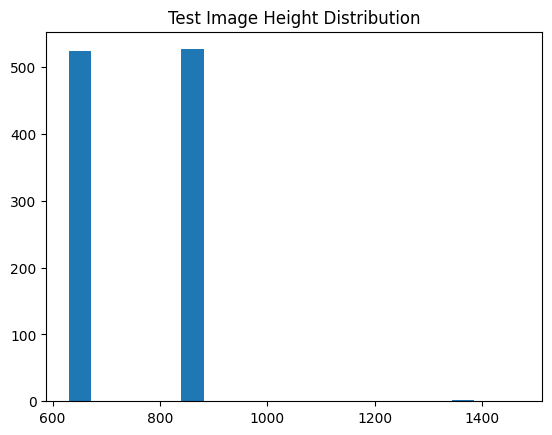

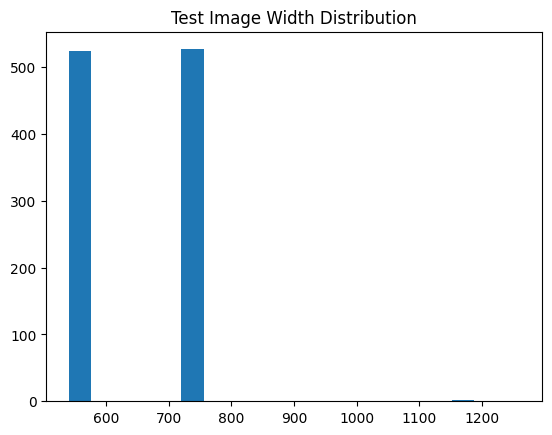

In [7]:
plt.figure()
plt.hist(heights, bins=20)
plt.title("Test Image Height Distribution")
plt.show()

plt.figure()
plt.hist(widths, bins=20)
plt.title("Test Image Width Distribution")
plt.show()


Brightness & Exposure Analysis (Drift Risk Indicator)


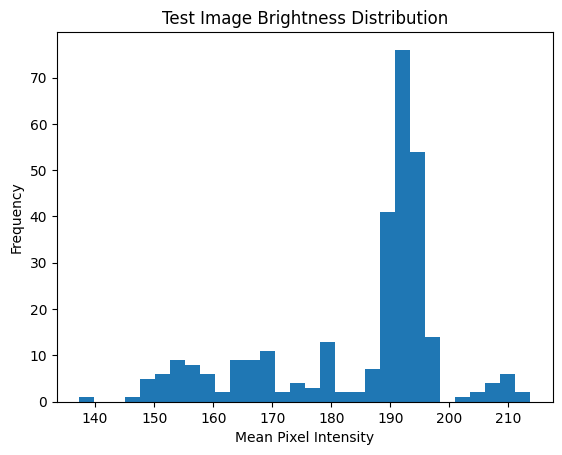

Brightness Range: 137.34896531452088 to 213.70789186507938


In [8]:
gray_means = []

for file in random.sample(test_images, 300):
    img = cv2.imread(os.path.join(TEST_DIR, file), 0)
    gray_means.append(img.mean())

plt.figure()
plt.hist(gray_means, bins=30)
plt.title("Test Image Brightness Distribution")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

print("Brightness Range:", min(gray_means), "to", max(gray_means))


Color Channel Distribution (Lighting Stability)


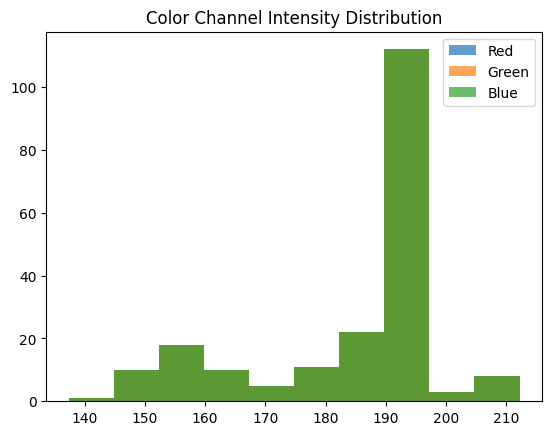

In [9]:
r_vals, g_vals, b_vals = [], [], []

for file in random.sample(test_images, 200):
    img = cv2.imread(os.path.join(TEST_DIR, file))
    b, g, r = cv2.split(img)
    r_vals.append(r.mean())
    g_vals.append(g.mean())
    b_vals.append(b.mean())

plt.figure()
plt.hist(r_vals, alpha=0.7, label="Red")
plt.hist(g_vals, alpha=0.7, label="Green")
plt.hist(b_vals, alpha=0.7, label="Blue")
plt.legend()
plt.title("Color Channel Intensity Distribution")
plt.show()
